##### Dtaset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##### Seperate the input and output variabls

In [7]:
x=df[['YearsExperience']] #input data

y=df['Salary']

In [8]:
x.shape  #total 30 empl

(30, 1)

In [10]:
df.corr()  ## highly correlated to each other 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


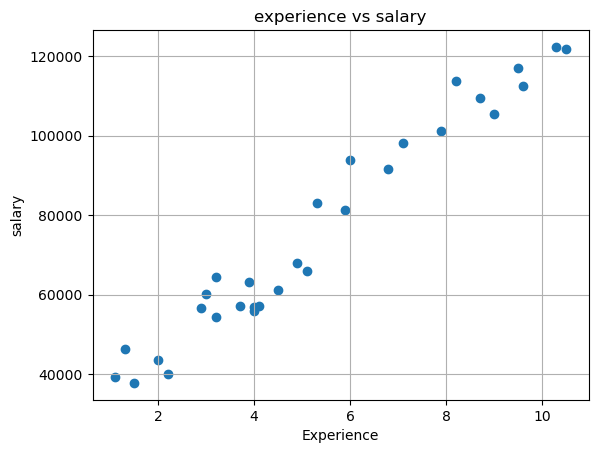

In [12]:
plt.grid()
plt.title('experience vs salary')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.scatter(x,y)

##### cross validation

In [15]:
#import the function
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [18]:
x_train.shape

(22, 1)

In [19]:
 x_test.shape

(8, 1)

In [20]:
y_train.shape

(22,)

##### Build the model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor= LinearRegression()

In [24]:
regressor.fit(x_train,y_train)

LinearRegression()

In [25]:
regressor.coef_,regressor.intercept_

(array([9379.71049195]), 26986.691316737248)

In [26]:
regressor.predict([[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [27]:
regressor.predict([[15]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167682.34869593])

In [28]:
x_test


,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [29]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
Name: Salary, dtype: float64

##### predict on the test data

In [30]:
y_pred=regressor.predict(x_test)

In [31]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [33]:
result= pd.DataFrame({
    'actual':y_test,
    'Predicted':y_pred
})
result

,actual,Predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [34]:
result= pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'abs(error)':abs(y_pred-y_test)
    
})
result

,x,y,y^,Error,abs(error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [35]:
np.mean(abs(y_pred-y_test))

3508.5455930660555

In [37]:
from sklearn.metrics import mean_absolute_error  ## both get same result 3508
mean_absolute_error(y_test,y_pred)

3508.5455930660555

##### root mean squqre error

In [38]:
result= pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'Error^2':(y_pred-y_test)**2
    
})
result

,x,y,y^,Error,Error^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [40]:
np.sqrt(np.mean((y_pred-y_test)**2))

4733.70258289858

In [46]:
from sklearn.metrics import mean_squared_error  
np.sqrt(mean_squared_error(y_test,y_pred))    ### in both case same result

4733.70258289858

In [47]:
#### squared error

In [48]:
mean_val=np.mean(y_test)

In [49]:
mean_val

84406.25

In [52]:
num=np.sum((y_test-mean_val)**2)-np.sum((y_test-y_pred)**2)
r2=num/np.sum((y_test-mean_val)**2) ## formula of square error

In [53]:
r2

0.9779208335417601

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)   #### directly useing formula like that sam value we get

0.9779208335417602

In [57]:
regressor.score(x_test,y_test) ### useing this also get same value

0.9779208335417602

In [58]:
regressor.score(x,y)

0.955975487542377

In [59]:
regressor.score(x_train,y_train)

0.9395413526983522

In [60]:
y_pred=regressor.predict(x)

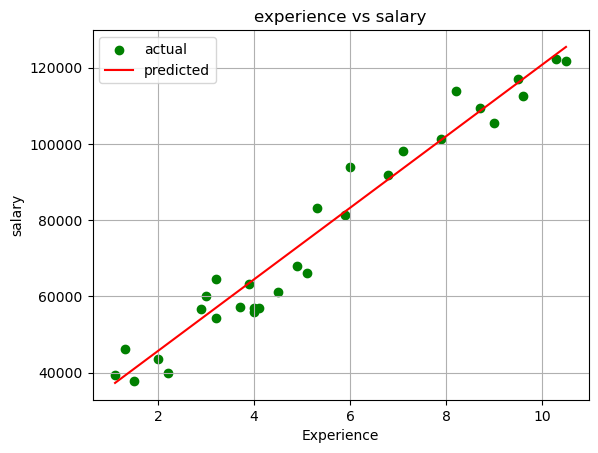

In [61]:
plt.grid()
plt.title('experience vs salary')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.scatter(x,y,color='green',label='actual')
plt.plot(x,y_pred,color='red',label='predicted')
plt.legend()

In [63]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)   

0.05754512646779697

In [64]:
exp=float(input('Enter the experience:'))
exp=pd.DataFrame({'YearsExperience':[exp]})
sal=regressor.predict(exp)
print('Your Expected salart can be:',sal[0])

Enter the experience: 5


Your Expected salart can be: 73885.24377646734
